<a href="https://colab.research.google.com/github/bomul0417/study/blob/main/NIDS_Project/kdd_pre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import sys

In [2]:
df_url = '/content/drive/Othercomputers/My Computer/졸작/New_NSL-KDD.csv'

In [3]:
df = pd.read_csv(df_url)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
148513,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,back
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [5]:
# 0:normal, 1:dos, 2:probe, 3:r2l, 4:u2r
dfdos = df.replace(['apache2', 'back', 'land', 'mailbomb', 'neptune', 'pod', 'processtable', 'smurf', 'teardrop', 'udpstorm'], 1)
dfprobe = dfdos.replace(['ipsweep', 'mscan', 'nmap', 'portsweep', 'saint', 'satan'], 2)
dfr2l = dfprobe.replace(['ftp_write', 'guess_passwd', 'imap', 'multihop', 'named', 'phf', 'sendmail', 'snmpgetattack', 'snmpguess', 'warezmaster', 'worm', 'xlock' ,'xsnoop', 'httptunnel', 'warezclient', 'spy'], 3)
dfu2r = dfr2l.replace(['buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'ps', 'sqlattack', 'xterm'], 4)
dfnormal = dfu2r.replace(['normal'], 0)
newdf = dfnormal
newdf

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
148513,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0


In [6]:
newdf['label']

0         0
1         0
2         1
3         0
4         0
         ..
148512    0
148513    0
148514    1
148515    0
148516    2
Name: label, Length: 148517, dtype: int64

In [7]:
newdf.value_counts('label')

label
0    77054
1    53385
2    14077
3     3882
4      119
dtype: int64

In [8]:
for columns in newdf.columns:
  if newdf[columns].dtypes == 'object':
    print(columns, '\n종류:', newdf[columns].unique(), '\n개수:', newdf[columns].nunique(), '\n')

protocol_type 
종류: ['tcp' 'udp' 'icmp'] 
개수: 3 

service 
종류: ['ftp_data' 'other' 'private' 'http' 'remote_job' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest'] 
개수: 70 

flag 
종류: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH'] 
개수: 11 



In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(newdf['protocol_type'])
protocol = le.transform(newdf['protocol_type'])

le.fit(newdf['service'])
service = le.transform(newdf['service'])

le.fit(newdf['flag'])
flag = le.transform(newdf['flag'])

newdf['protocol_type'] = protocol
newdf['service'] = service
newdf['flag'] = flag

In [10]:
newdf

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,1,54,9,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
148513,0,1,24,9,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
148514,0,1,24,9,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1
148515,0,2,12,9,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0


In [11]:
newdf.to_csv('/content/drive/Othercomputers/My Computer/졸작/newdf.csv', mode='w')

In [12]:
df_X = newdf.drop(columns=['label'])
df_Y = newdf['label']

In [13]:
df_X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,20,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,1,54,9,794,333,0,0,0,0,...,100,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
148513,0,1,24,9,317,938,0,0,0,0,...,197,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
148514,0,1,24,9,54540,8314,0,0,0,2,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07
148515,0,2,12,9,42,42,0,0,0,0,...,255,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00


In [14]:
df_Y

0         0
1         0
2         1
3         0
4         0
         ..
148512    0
148513    0
148514    1
148515    0
148516    2
Name: label, Length: 148517, dtype: int64

In [15]:
from sklearn.preprocessing import MinMaxScaler

#pd.options.display.float_format = '{:.9f}'.format #지수표현 X
#pd.reset_option('display.float_format') 

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(df_X)

xle = pd.DataFrame(np_scaled, columns = df_X.columns)

xle

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.5,0.289855,0.9,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.000000,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,1.0,0.637681,0.9,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.000000,...,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,...,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,0.5,0.347826,0.9,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.000000,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,0.5,0.347826,0.9,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.000000,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0.0,0.5,0.782609,0.9,5.753774e-07,2.542106e-07,0.0,0.0,0.0,0.000000,...,0.392157,0.552941,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00
148513,0.0,0.5,0.347826,0.9,2.297162e-07,7.160648e-07,0.0,0.0,0.0,0.000000,...,0.772549,1.000000,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00
148514,0.0,0.5,0.347826,0.9,3.952277e-05,6.346868e-06,0.0,0.0,0.0,0.019802,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07
148515,0.0,1.0,0.173913,0.9,3.043558e-08,3.206260e-08,0.0,0.0,0.0,0.000000,...,1.000000,0.988235,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00


In [16]:
from sklearn.model_selection import train_test_split

X, X_test, Y, Y_test = train_test_split(xle, df_Y, test_size=0.2, random_state=2022)

print(X.shape, Y.shape)
print(X_test.shape, Y_test.shape)

(118813, 41) (118813,)
(29704, 41) (29704,)


In [17]:
X2, X_val, Y2, Y_val = train_test_split(X, Y)
print(X2.shape, Y2.shape)
print(X_val.shape, Y_val.shape)

(89109, 41) (89109,)
(29704, 41) (29704,)


In [18]:
X_train = X.values
X_test = X_test.values
y_train = Y.values
y_test = Y_test.values
X_val = X_val.values
Y_val = Y_val.values

In [19]:
X_train_t = X_train.reshape(X_train.shape[0], 41, 1)
X_test_t = X_test.reshape(X_test.shape[0], 41, 1)
X_val_t = X_val.reshape(X_val.shape[0], 41, 1)
print(X_train_t.shape)
print(X_train_t)
print(X_val_t)
print(y_test)

(118813, 41, 1)
[[[8.66325912e-05]
  [5.00000000e-01]
  [2.89855072e-01]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [5.00000000e-01]
  [3.47826087e-01]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [5.00000000e-01]
  [1.00000000e+00]
  ...
  [1.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 ...

 [[0.00000000e+00]
  [1.00000000e+00]
  [1.73913043e-01]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[3.46530365e-05]
  [5.00000000e-01]
  [2.89855072e-01]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [5.00000000e-01]
  [1.88405797e-01]
  ...
  [1.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]]
[[[0.        ]
  [0.5       ]
  [0.34782609]
  ...
  [0.22      ]
  [0.7       ]
  [0.7       ]]

 [[0.        ]
  [0.5       ]
  [0.86956522]
  ...
  [1.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.5       ]
  [0.34782609]
  ...

In [20]:
from keras.utils import np_utils

In [21]:
y_test_en= np_utils.to_categorical(y_test)
y_train_en= np_utils.to_categorical(y_train)
Y_val_en= np_utils.to_categorical(Y_val)

In [22]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()
model = Sequential() 
model.add(LSTM(10, input_shape=(41,1), activation='relu')) 
model.add(Dense(5, activation='softmax')) 
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10)                480       
                                                                 
 dense (Dense)               (None, 5)                 55        
                                                                 
Total params: 535
Trainable params: 535
Non-trainable params: 0
_________________________________________________________________


In [23]:
mod=model.fit(X_train_t, y_train_en, epochs=10, batch_size=64, validation_data=(X_val, Y_val_en))

Epoch 1/10
1857/1857 [==============================] - 37s 19ms/step - loss: 0.8741 - accuracy: 0.7074 - val_loss: 0.5124 - val_accuracy: 0.8332
Epoch 2/10
1857/1857 [==============================] - 32s 17ms/step - loss: 0.4899 - accuracy: 0.8341 - val_loss: 0.4481 - val_accuracy: 0.8393
Epoch 3/10
1857/1857 [==============================] - 32s 17ms/step - loss: 0.4340 - accuracy: 0.8584 - val_loss: 0.4484 - val_accuracy: 0.8539
Epoch 4/10
1857/1857 [==============================] - 33s 18ms/step - loss: 0.3830 - accuracy: 0.8876 - val_loss: 0.4322 - val_accuracy: 0.8618
Epoch 5/10
1857/1857 [==============================] - 34s 18ms/step - loss: 0.3321 - accuracy: 0.9027 - val_loss: 0.3026 - val_accuracy: 0.9108
Epoch 6/10
1857/1857 [==============================] - 35s 19ms/step - loss: 0.2992 - accuracy: 0.9111 - val_loss: 0.2799 - val_accuracy: 0.9119
Epoch 7/10
1857/1857 [==============================] - 34s 18ms/step - loss: 0.2761 - accuracy: 0.9168 - val_loss: 0.2651 -

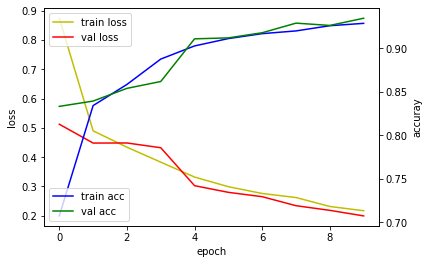

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(mod.history['loss'], 'y', label='train loss')
loss_ax.plot(mod.history['val_loss'], 'r', label='val loss')

acc_ax.plot(mod.history['accuracy'], 'b', label='train acc')
acc_ax.plot(mod.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()